<a href="https://colab.research.google.com/github/seleozz/project/blob/main/poject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#настройка стиля графиков для лучшей читаемости
sns.set_style("whitegrid")
#установка порога для отображения всех столбцов
pd.set_option('display.max_columns', None)

A. Загрузка и Первичный Обзор

In [ ]:
#1.загрузка данных
try:
    df = pd.read_csv('google_books_dataset.csv')
    print("Датасет успешно загружен.")
except FileNotFoundError:
    print("Ошибка: Файл 'data.csv' не найден. Убедитесь, что файл находится в той же директории или укажите полный путь.")
    #создание фиктивного датафрейма для демонстрации кода
    data = {
        'ID': range(100),
        'Age': np.random.randint(18, 65, 100),
        'Salary': np.random.randint(30000, 150000, 100),
        'Gender': np.random.choice(['Male', 'Female', np.nan], 100, p=[0.45, 0.5, 0.05]),
        'Experience': np.random.normal(5, 3, 100).clip(0, 20),
        'City': np.random.choice(['A', 'B', 'C', 'D'], 100),
        'Rating': np.random.uniform(1.0, 5.0, 100)
    }
    df = pd.DataFrame(data)
    #искусственное добавление пропусков и дубликатов для демонстрации
    df.loc[[5, 15, 25], 'Salary'] = np.nan
    df.loc[60, 'Age'] = 150 #выброс
    df = pd.concat([df, df.iloc[0:5]], ignore_index=True) #добавление дубликатов
    print("Используется демонстрационный датасет")


#2.первые/последние строки
print("\nПервые 5 строк датасета:")
print(df.head())

#3.структура данных (количество строк/столбцов)
print("\n## 📊 Структура данных:")
print(f"Количество строк: {df.shape[0]}, Количество столбцов: {df.shape[1]}")

#4.проверка типов данных
print("\nТипы данных и пропуски (info):")
df.info()

#5.приведение типов (пример)
#'Experience' может содержать пропуски (NaN - float), поэтому переводим в Int64
try:
    df['Experience'] = df['Experience'].astype('Int64', errors='ignore')
    print("\nСтолбец 'Experience' приведен к типу Int64.")
except:
    pass #пропускаем, если столбца нет в демонстрационном наборе

Датасет успешно загружен.

Первые 5 строк датасета:
        book_id                                    title  \
0  LR_VDQAAQBAJ                              Bestsellers   
1  WcjTDQAAQBAJ                              Bestsellers   
2  4fXUDAAAQBAJ                      The Bestseller Code   
3  yIVuDwAAQBAJ                               Bestseller   
4  2JHXwAEACAAJ  Bestsellers: Popular Fiction since 1900   

                                            subtitle  \
0  The Path (bestsellers, free bestsellers, bests...   
1  Hell: A Place Without Hope (bestseller books, ...   
2                   Anatomy of the Blockbuster Novel   
3              A Century of America's Favorite Books   
4                                                NaN   

                            authors                  publisher published_date  \
0            Ivan King, bestsellers                bestsellers     2017-01-04   
1            Ivan King, bestsellers                bestsellers     2017-01-03   
2  Jodi

B. Обработка Данных

Пропущенные значения

In [ ]:
missing_counts = df.isnull().sum()

print("Количество пропущенных значений в каждом столбце:")
print(missing_counts)

#процент пропущенных значений
print("\nПроцент пропущенных значений в каждом столбце:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage.round(2).astype(str) + '%')

Количество пропущенных значений в каждом столбце:
book_id                0
title                  8
subtitle            9164
authors             3525
publisher           8057
published_date       214
description         6796
page_count           214
categories          2452
average_rating     14290
ratings_count          0
language               0
preview_link           0
info_link              0
isbn_13             7764
isbn_10             8026
list_price         12204
currency           12204
buyable                0
search_category        0
thumbnail            669
dtype: int64

Процент пропущенных значений в каждом столбце:
book_id              0.0%
title               0.05%
subtitle            60.5%
authors            23.27%
publisher          53.19%
published_date      1.41%
description        44.87%
page_count          1.41%
categories         16.19%
average_rating     94.34%
ratings_count        0.0%
language             0.0%
preview_link         0.0%
info_link            0.0%


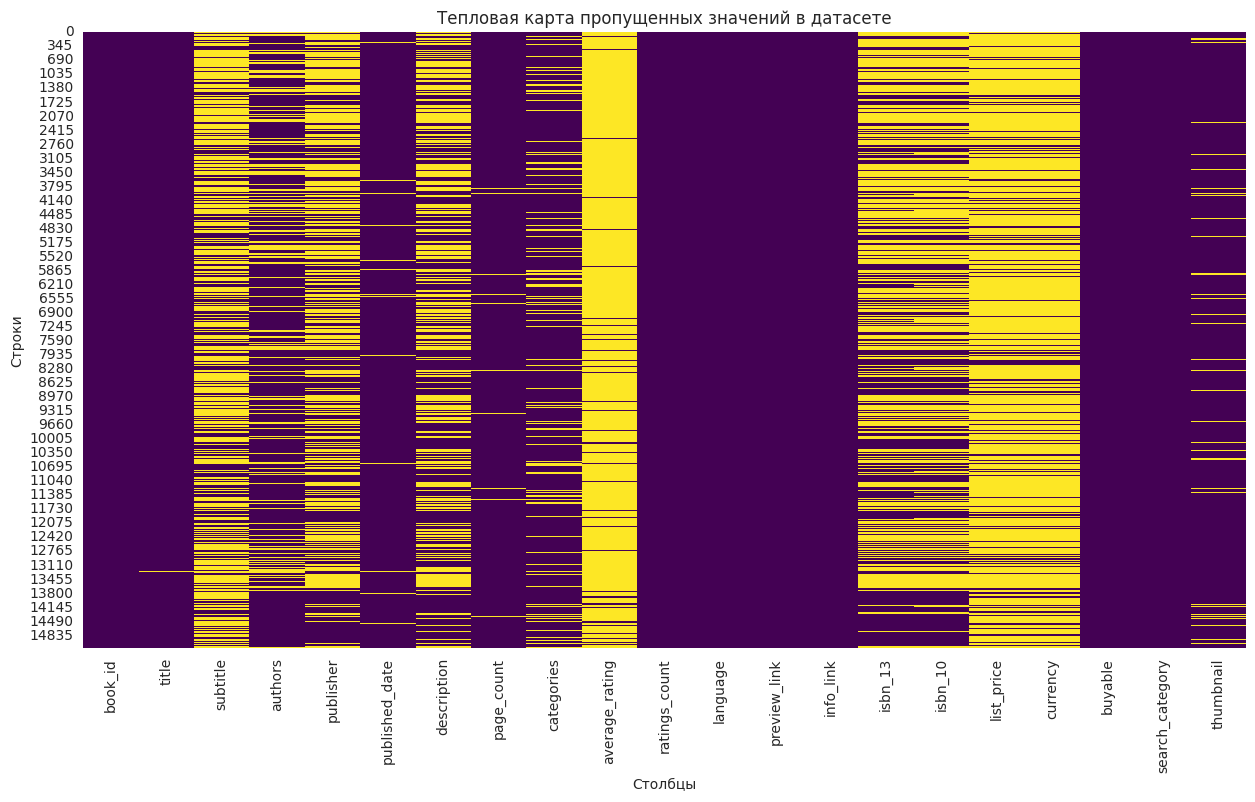

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Тепловая карта пропущенных значений в датасете')
plt.xlabel('Столбцы')
plt.ylabel('Строки')
plt.show()

In [ ]:
print("Применение стратегий обработки пропущенных значений...")

#1.удаление столбцов с большим количеством пропусков
initial_columns_to_drop = ['average_rating', 'list_price', 'currency']
columns_to_drop_now = [col for col in initial_columns_to_drop if col in df.columns]

if columns_to_drop_now:
    df = df.drop(columns=columns_to_drop_now)
    print(f" Столбцы {columns_to_drop_now} удалены.")
else:
    print(f" Столбцы {initial_columns_to_drop} уже отсутствуют в датафрейме или не были найдены. Пропускаем удаление.")

#2.заполнение категориальных/текстовых столбцов
categorical_text_columns = ['subtitle', 'authors', 'publisher', 'description', 'categories', 'thumbnail', 'isbn_13', 'isbn_10']
fill_values = {
    'subtitle': '',
    'authors': 'Unknown Author',
    'publisher': 'Unknown Publisher',
    'description': 'No description available',
    'categories': 'Unknown Category',
    'thumbnail': 'No Thumbnail',
    'isbn_13': 'N/A',
    'isbn_10': 'N/A'
}

for col, fill_val in fill_values.items():
    if col in df.columns:
        df[col] = df[col].fillna(fill_val)
print("Пропущенные значения в текстовых/категориальных столбцах заполнены.")

#3.заполнение числовых столбцов медианой
if 'page_count' in df.columns:
    median_page_count = df['page_count'].median()
    df['page_count'] = df['page_count'].fillna(median_page_count)
    print(f"Пропущенные значения в 'page_count' заполнены медианой ({median_page_count}).")
else:
    print(f"Столбец 'page_count' отсутствует в датафрейме. Пропускаем заполнение.")

#4.удаление строк с пропусками в критических столбцах
critical_columns_to_check = ['title', 'published_date']
existing_critical_columns = [col for col in critical_columns_to_check if col in df.columns]

if existing_critical_columns:
    df_before_drop = df.shape[0]
    df = df.dropna(subset=existing_critical_columns)
    df_after_drop = df.shape[0]
    print(f"Удалено {df_before_drop - df_after_drop} строк с пропусками в {existing_critical_columns}.")
else:
    print(f"Критические столбцы для удаления строк {critical_columns_to_check} отсутствуют в датафрейме. Пропускаем удаление строк.")

#5.проверка результатов: повторный подсчет пропущенных значений
print("\n Проверка результатов обработки пропущенных значений:")
missing_after_processing = df.isnull().sum()
print(missing_after_processing[missing_after_processing > 0])

print("\n Новые размеры датафрейма:")
print(f"Количество строк: {df.shape[0]}, Количество столбцов: {df.shape[1]}")

Применение стратегий обработки пропущенных значений...
 Столбцы ['average_rating', 'list_price', 'currency'] удалены.
Пропущенные значения в текстовых/категориальных столбцах заполнены.
Пропущенные значения в 'page_count' заполнены медианой (368.0).
Удалено 215 строк с пропусками в ['title', 'published_date'].

 Проверка результатов обработки пропущенных значений:
Series([], dtype: int64)

 Новые размеры датафрейма:
Количество строк: 14932, Количество столбцов: 18


Дубликаты

In [ ]:
#1.поиск дубликатов
duplicates = df.duplicated()

#2.вывод количества дублирующихся строк
num_duplicates = duplicates.sum()
print(f"Обнаружено {num_duplicates} дублирующихся строк.")

#3.удаление дубликатов, если они есть
if num_duplicates > 0:
    df_before_drop_duplicates = df.shape[0]
    df = df.drop_duplicates()
    df_after_drop_duplicates = df.shape[0]
    print(f"Удалено {df_before_drop_duplicates - df_after_drop_duplicates} дубликатов.")
    print(f"Новое количество строк после удаления дубликатов: {df.shape[0]}")
else:
    print("Дубликатов не найдено.")

#4.проверка новых размеров датафрейма
print(f"\nНовые размеры датафрейма: {df.shape[0]} строк, {df.shape[1]} столбцов.")

Обнаружено 0 дублирующихся строк.
Дубликатов не найдено.

Новые размеры датафрейма: 14932 строк, 18 столбцов.


Выбросы (при необходимости)

Обнаружение выбросов с помощью Z-оценки для 'page_count'

Расчет Z-оценки для столбца 'page_count' (среднее: 484.19, стандартное отклонение: 435.77).
Обнаружено 233 выбросов в 'page_count' с использованием Z-оценки (порог: 3).

Примеры выбросов (на основе Z-оценки):

                                                 title  page_count  \
81                     Subject Guide to Books in Print      3310.0   
103  Publishers' Circular and Booksellers' Record o...      2158.0   
125                                  Collected Fiction      2516.0   
449                                  Parents' Magazine      1796.0   
490                                Film & Video Finder      2512.0   

     zscore_page_count  
81            6.484697  
103           3.841074  
125           4.662617  
449           3.010352  
490           4.653437  


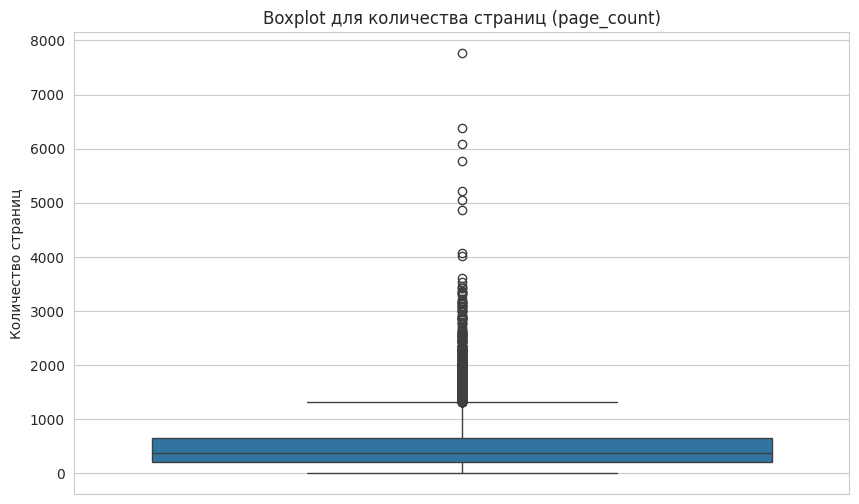

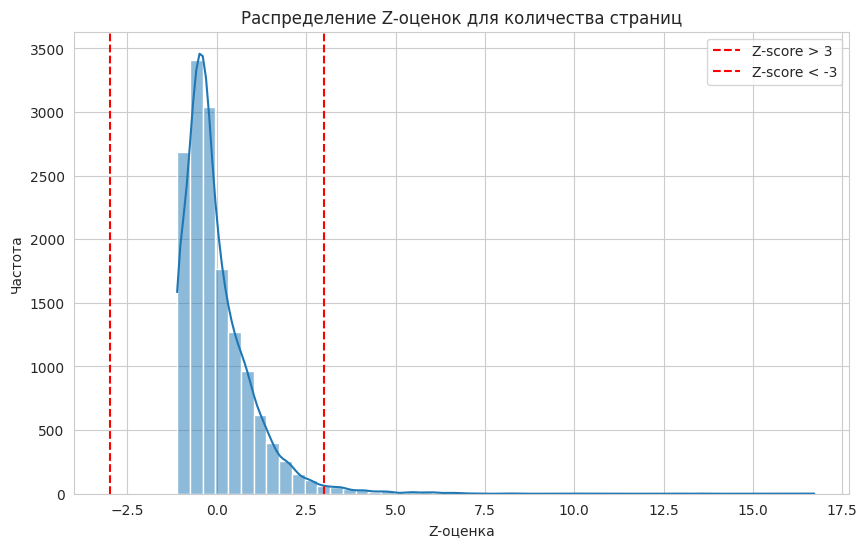

In [ ]:
print("Обнаружение выбросов с помощью Z-оценки для 'page_count'\n")

#1.вычисление Z-оценки для 'page_count'
#Z-оценка = (значение - среднее) / стандартное отклонение
#используем .select_dtypes(include=np.number) для выбора только числовых столбцов
numerical_cols = df.select_dtypes(include=np.number).columns

if 'page_count' in numerical_cols:
    mean_page_count = df['page_count'].mean()
    std_page_count = df['page_count'].std()

    #избегаем деления на ноль
    if std_page_count == 0:
        print("Стандартное отклонение 'page_count' равно нулю, Z-оценка не может быть вычислена.")
        df['zscore_page_count'] = 0
    else:
        df['zscore_page_count'] = (df['page_count'] - mean_page_count) / std_page_count

    print(f"Расчет Z-оценки для столбца 'page_count' (среднее: {mean_page_count:.2f}, стандартное отклонение: {std_page_count:.2f}).")

    #2.определение порогового значения для выбросов
    zscore_threshold = 3
    outliers_zscore = df[abs(df['zscore_page_count']) > zscore_threshold]

    print(f"Обнаружено {len(outliers_zscore)} выбросов в 'page_count' с использованием Z-оценки (порог: {zscore_threshold}).")
    print("\nПримеры выбросов (на основе Z-оценки):\n")
    if not outliers_zscore.empty:
        print(outliers_zscore[['title', 'page_count', 'zscore_page_count']].head())
    else:
        print("Нет выбросов, превышающих пороговое значение.")

    #3.визуализация 'page_count' с помощью boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df['page_count'])
    plt.title('Boxplot для количества страниц (page_count)')
    plt.ylabel('Количество страниц')
    plt.show()

    #визуализация распределения Z-оценок
    plt.figure(figsize=(10, 6))
    sns.histplot(df['zscore_page_count'], bins=50, kde=True)
    plt.axvline(x=zscore_threshold, color='r', linestyle='--', label=f'Z-score > {zscore_threshold}')
    plt.axvline(x=-zscore_threshold, color='r', linestyle='--', label=f'Z-score < -{zscore_threshold}')
    plt.title('Распределение Z-оценок для количества страниц')
    plt.xlabel('Z-оценка')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()
else:
    print("Столбец 'page_count' отсутствует в датафрейме. Пропускаем анализ выбросов Z-оценки и Boxplot.")


#для `ratings_count`, Z-оценка может быть менее информативна, так как большинство значений 0.
#если бы были другие числовые столбцы с более разнообразным распределением, их также можно было бы анализировать

Статистики данных:

In [ ]:
print("Описательная статистика для числовых столбцов:\n")
print(df.describe())

print("\nОписательная статистика для категориальных столбцов:\n")
print(df.describe(include='object'))

Описательная статистика для числовых столбцов:

         page_count  ratings_count  zscore_page_count
count  14932.000000   14932.000000       1.493200e+04
mean     484.191937       0.384342       4.187501e-17
std      435.765634       9.340912       1.000000e+00
min        0.000000       0.000000      -1.111129e+00
25%      210.000000       0.000000      -6.292188e-01
50%      368.000000       0.000000      -2.666386e-01
75%      652.000000       0.000000       3.850879e-01
max     7768.000000     826.000000       1.671497e+01

Описательная статистика для категориальных столбцов:

             book_id     title subtitle         authors          publisher  \
count          14932     14932    14932           14932              14932   
unique         14932     12977     5217            8942               1939   
top     yqWlwa0S5twC  Bulletin           Unknown Author  Unknown Publisher   
freq               1        33     9023            3453               7964   

       published_dat

C. Визуализация данных

In [ ]:
print("Конвертация столбца 'published_date' в формат datetime...")

df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

print("Проверка типов данных после конвертации:")
df.info()

Конвертация столбца 'published_date' в формат datetime...
Проверка типов данных после конвертации:
<class 'pandas.core.frame.DataFrame'>
Index: 14932 entries, 0 to 15146
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   book_id            14932 non-null  object        
 1   title              14932 non-null  object        
 2   subtitle           14932 non-null  object        
 3   authors            14932 non-null  object        
 4   publisher          14932 non-null  object        
 5   published_date     6054 non-null   datetime64[ns]
 6   description        14932 non-null  object        
 7   page_count         14932 non-null  float64       
 8   categories         14932 non-null  object        
 9   ratings_count      14932 non-null  int64         
 10  language           14932 non-null  object        
 11  preview_link       14932 non-null  object        
 12  info_link          149

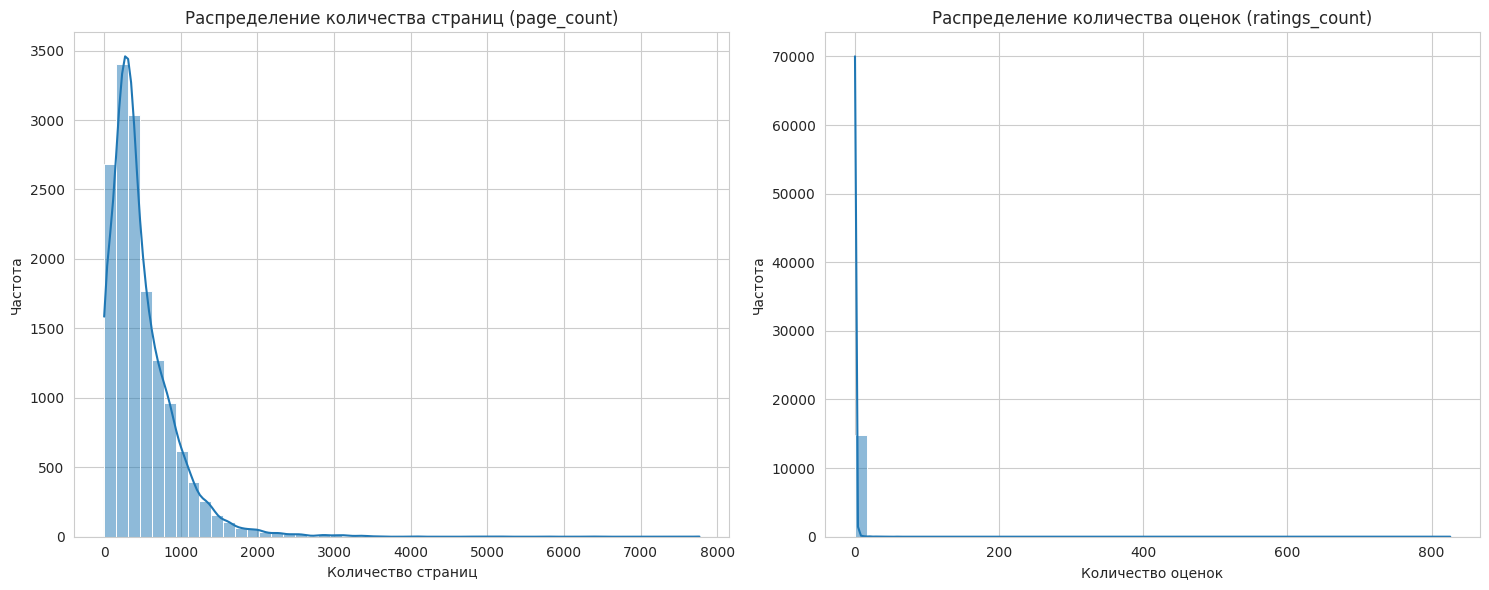

In [ ]:
plt.figure(figsize=(15, 6))

#гистограма'page_count'
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df['page_count'], kde=True, bins=50)
plt.title('Распределение количества страниц (page_count)')
plt.xlabel('Количество страниц')
plt.ylabel('Частота')

#гистограма'ratings_count'
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(df['ratings_count'], kde=True, bins=50)
plt.title('Распределение количества оценок (ratings_count)')
plt.xlabel('Количество оценок')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()


Подготовка данных для линейного графика по годам публикации...
Данные для графика тренда публикаций по годам подготовлены.


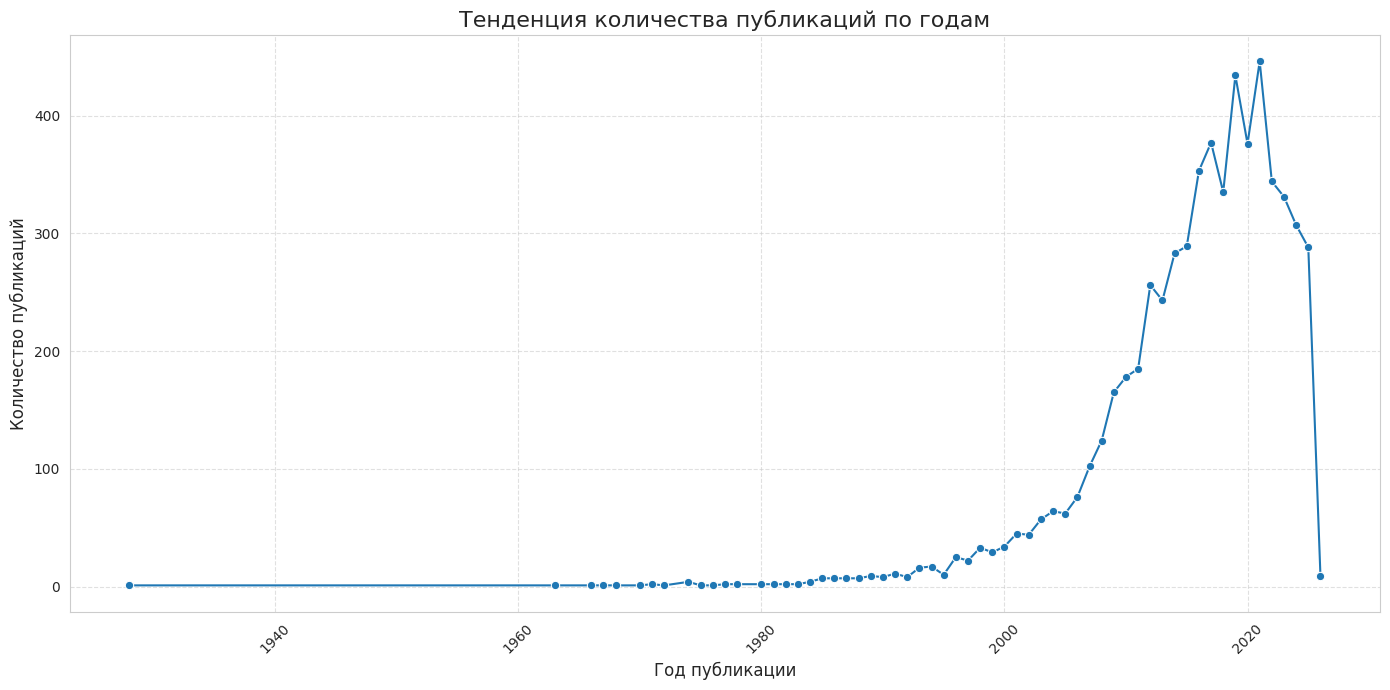

In [ ]:
print("Подготовка данных для линейного графика по годам публикации...")

#1.извлечение года из 'published_date' и создание нового столбца
#используем .dt.year для извлечения года, пропуски останутся NaN
df['publication_year'] = df['published_date'].dt.year

#отфильтруем строки, где publication_year является NaN, так как они не могут быть использованы для анализа по годам
df_yearly_publications = df.dropna(subset=['publication_year'])

#2.подсчет количества публикаций для каждого года
yearly_counts = df_yearly_publications['publication_year'].value_counts().reset_index()
yearly_counts.columns = ['publication_year', 'publication_count']

#3.отсортировка данных по году
yearly_counts = yearly_counts.sort_values(by='publication_year')

print("Данные для графика тренда публикаций по годам подготовлены.")

#4.создание линейного графика
plt.figure(figsize=(14, 7))
sns.lineplot(x='publication_year', y='publication_count', data=yearly_counts, marker='o')

#5.добавление заголовка к графику
plt.title('Тенденция количества публикаций по годам', fontsize=16)

#6.добавление подписей к осям X и Y
plt.xlabel('Год публикации', fontsize=12)
plt.ylabel('Количество публикаций', fontsize=12)

#улучшение читаемости оси X годы
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Создание столбчатой диаграммы для 'language'...


/tmp/ipython-input-661797932.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='language', y='count', data=language_counts, palette='viridis')


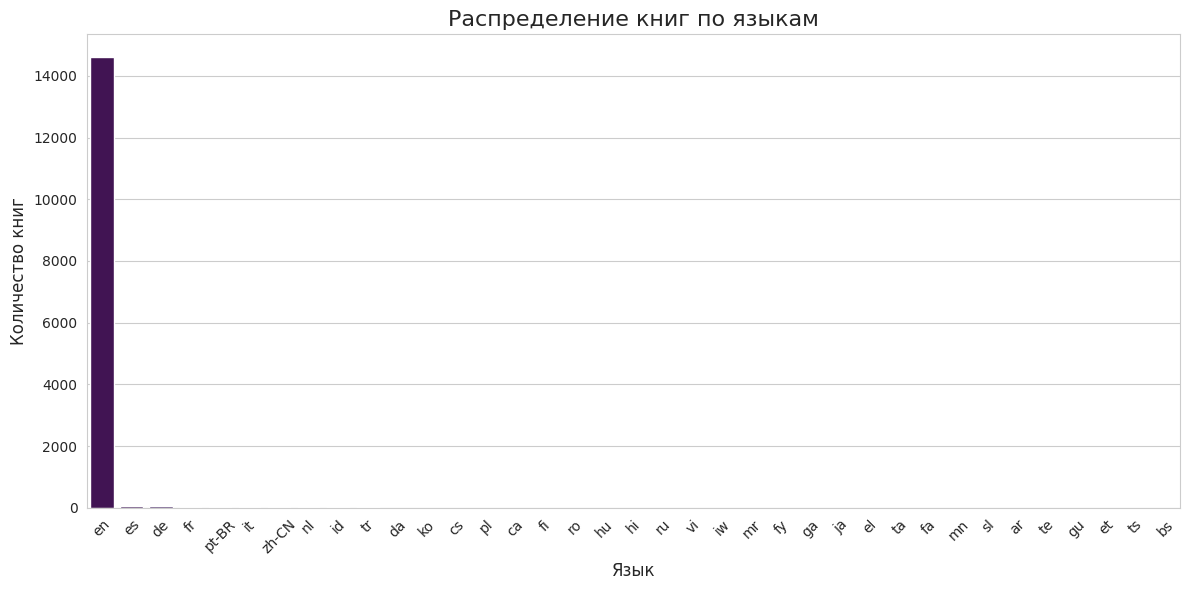

In [ ]:
print("Создание столбчатой диаграммы для 'language'...")

#1.подсчет количества книг для каждого языка
language_counts = df['language'].value_counts().reset_index()
language_counts.columns = ['language', 'count']

#2.создание столбчатой диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(x='language', y='count', data=language_counts, palette='viridis')
plt.title('Распределение книг по языкам', fontsize=16)
plt.xlabel('Язык', fontsize=12)
plt.ylabel('Количество книг', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Создание столбчатой диаграммы для 'categories' (топ-10)...


/tmp/ipython-input-3186397968.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='count', data=category_counts, palette='magma')


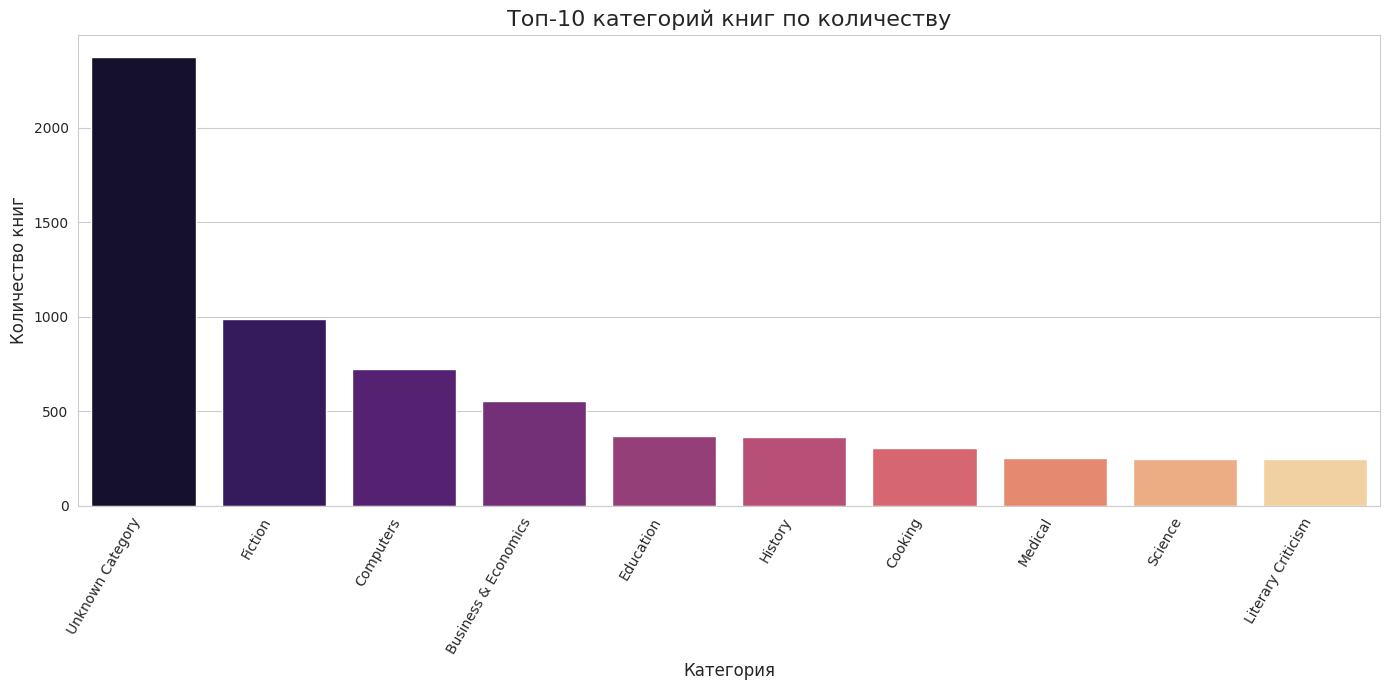

In [ ]:
print("Создание столбчатой диаграммы для 'categories' (топ-10)...")

#1.подсчет количества книг для каждой категории
#'categories' может содержать несколько категорий через запятую, но для простоты начнем с прямых значений
category_counts = df['categories'].value_counts().head(10).reset_index()
category_counts.columns = ['category', 'count']

#2.создание столбчатой диаграммы
plt.figure(figsize=(14, 7))
sns.barplot(x='category', y='count', data=category_counts, palette='magma')
plt.title('Топ-10 категорий книг по количеству', fontsize=16)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Количество книг', fontsize=12)
plt.xticks(rotation=60, ha='right') #поворот меток для лучшей читаемости
plt.tight_layout()
plt.show()

/tmp/ipython-input-2508566498.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='publisher', y='count', data=publisher_counts, palette='crest')


Создание столбчатой диаграммы для 'publisher' (топ-10)...


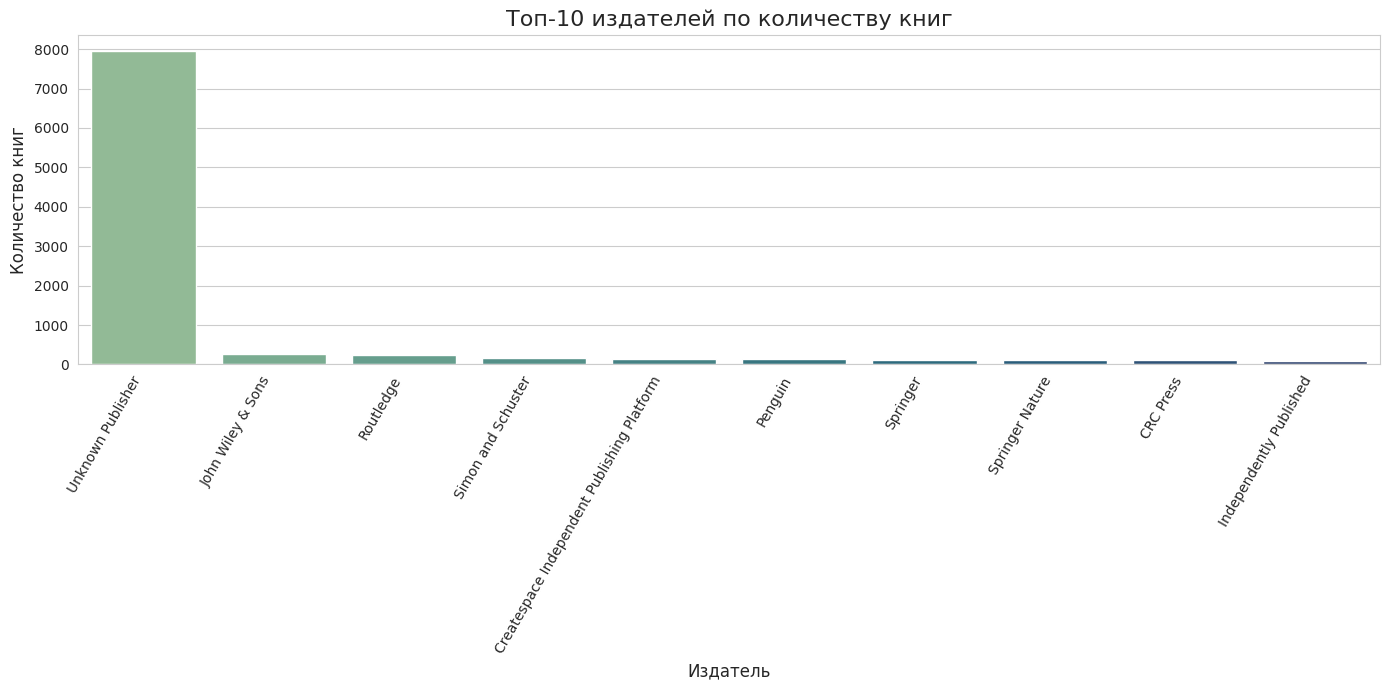

In [ ]:
print("Создание столбчатой диаграммы для 'publisher' топ-10...")

#1.подсчет количества книг для каждого издателя топ-10
publisher_counts = df['publisher'].value_counts().head(10).reset_index()
publisher_counts.columns = ['publisher', 'count']

#2.создание столбчатой диаграммы
plt.figure(figsize=(14, 7))
sns.barplot(x='publisher', y='count', data=publisher_counts, palette='crest')
plt.title('Топ-10 издателей по количеству книг', fontsize=16)
plt.xlabel('Издатель', fontsize=12)
plt.ylabel('Количество книг', fontsize=12)
plt.xticks(rotation=60, ha='right') #поворот меток для лучшей читаемости
plt.tight_layout()
plt.show()

Создание столбчатой диаграммы для 'authors' (топ-10)...


/tmp/ipython-input-1046003397.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='author', y='count', data=author_counts, palette='crest')


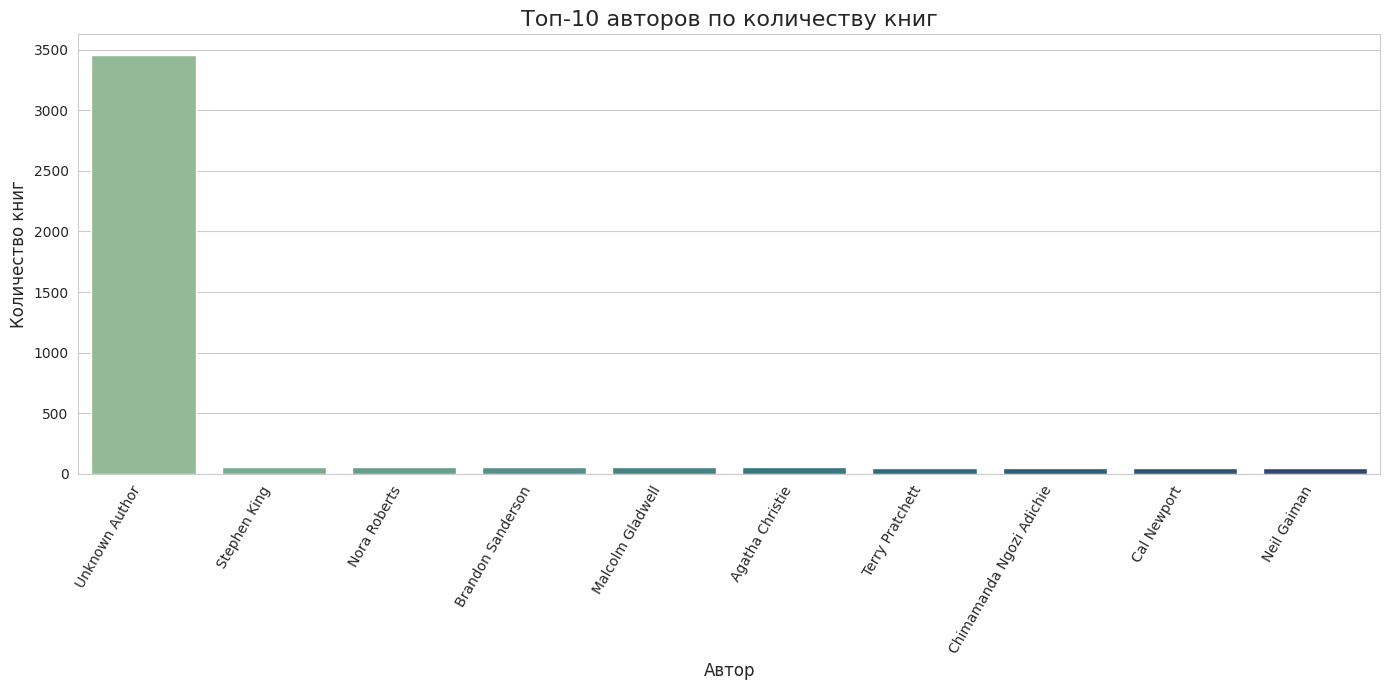

In [ ]:
print("Создание столбчатой диаграммы для 'authors' топ-10...")

#1.подсчет количества книг для каждого автора топ-10
author_counts = df['authors'].value_counts().head(10).reset_index()
author_counts.columns = ['author', 'count']

#2.создание столбчатой диаграммы
plt.figure(figsize=(14, 7))
sns.barplot(x='author', y='count', data=author_counts, palette='crest')
plt.title('Топ-10 авторов по количеству книг', fontsize=16)
plt.xlabel('Автор', fontsize=12)
plt.ylabel('Количество книг', fontsize=12)
plt.xticks(rotation=60, ha='right') #поворот меток для лучшей читаемости
plt.tight_layout()
plt.show()

Создание столбчатой диаграммы для 'authors' (топ-10)...


/tmp/ipython-input-1046003397.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='author', y='count', data=author_counts, palette='crest')


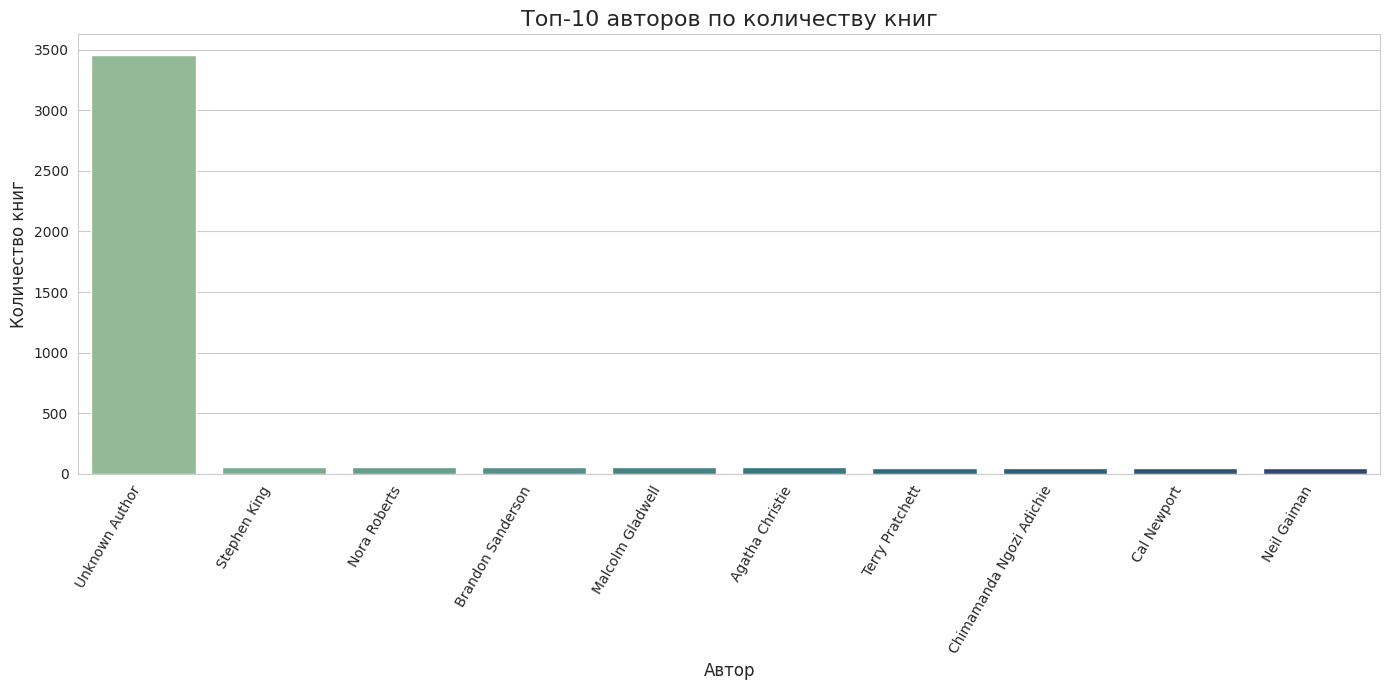

In [ ]:
print("Создание столбчатой диаграммы для 'authors' топ-10...")

#1.подсчет количества книг для каждого автора (топ-10)
author_counts = df['authors'].value_counts().head(10).reset_index()
author_counts.columns = ['author', 'count']

#2.создание столбчатой диаграммы
plt.figure(figsize=(14, 7))
sns.barplot(x='author', y='count', data=author_counts, palette='crest')
plt.title('Топ-10 авторов по количеству книг', fontsize=16)
plt.xlabel('Автор', fontsize=12)
plt.ylabel('Количество книг', fontsize=12)
plt.xticks(rotation=60, ha='right') #поворот меток для лучшей читаемости
plt.tight_layout()
plt.show()

Создание столбчатой диаграммы для 'authors' (топ-10)...


/tmp/ipython-input-1046003397.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='author', y='count', data=author_counts, palette='crest')


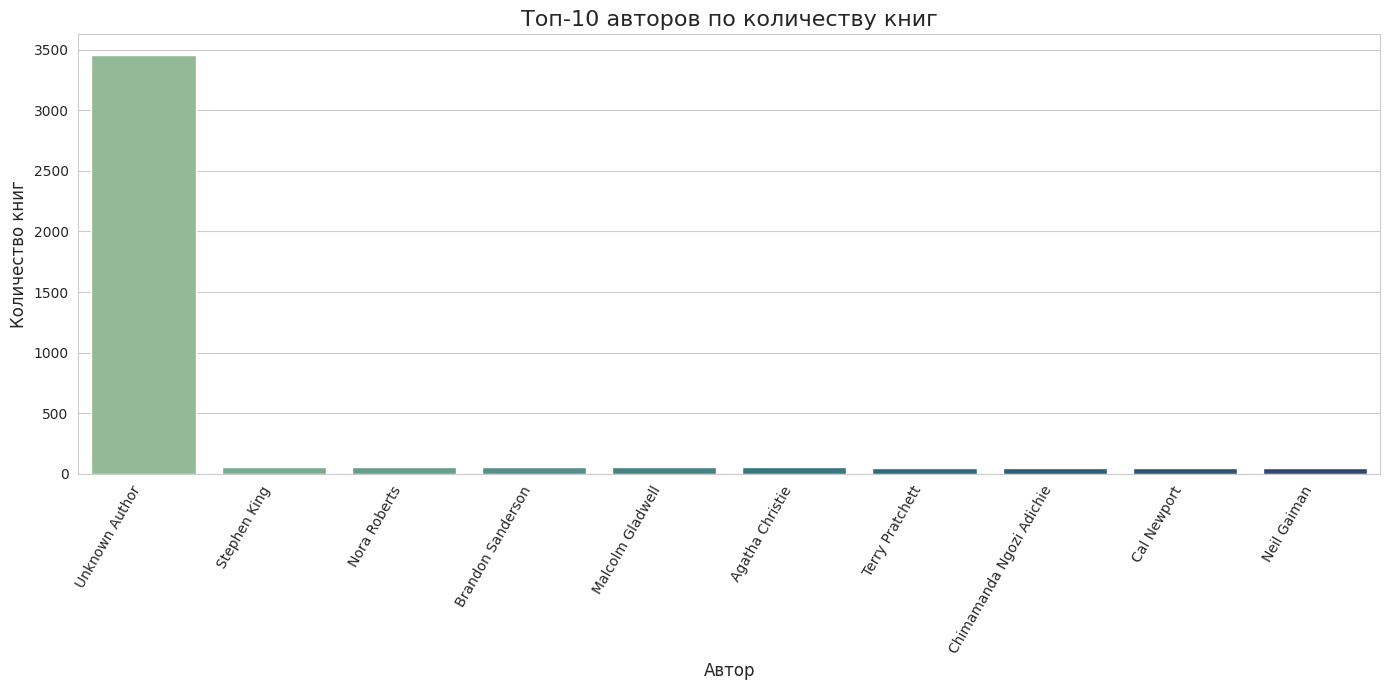

In [ ]:
print("Создание столбчатой диаграммы для 'authors' топ-10...")

#1.пдсчет количества книг для каждого автора топ-10
author_counts = df['authors'].value_counts().head(10).reset_index()
author_counts.columns = ['author', 'count']

#2.создание столбчатой диаграммы
plt.figure(figsize=(14, 7))
sns.barplot(x='author', y='count', data=author_counts, palette='crest')
plt.title('Топ-10 авторов по количеству книг', fontsize=16)
plt.xlabel('Автор', fontsize=12)
plt.ylabel('Количество книг', fontsize=12)
plt.xticks(rotation=60, ha='right') #поворот меток для лучшей читаемости
plt.tight_layout()
plt.show()

In [ ]:
print("Создание столбчатой диаграммы для 'authors' топ-10 завершено.")

Создание столбчатой диаграммы для 'authors' (топ-10) завершено.


Создание boxplot для 'ratings_count'...


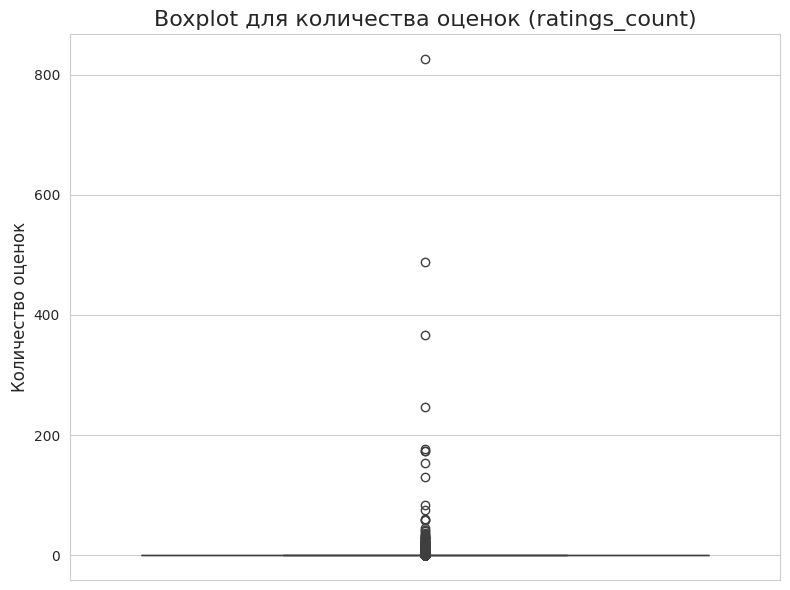

In [ ]:
print("Создание boxplot для 'ratings_count'...")

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ratings_count'])
plt.title('Boxplot для количества оценок (ratings_count)', fontsize=16)
plt.ylabel('Количество оценок', fontsize=12)
plt.tight_layout()
plt.show()

Создание boxplot для 'page_count'...


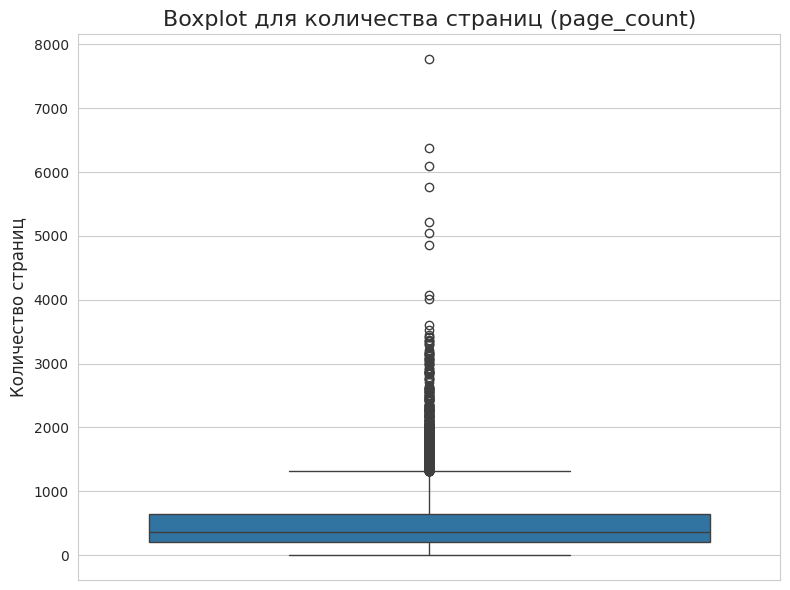

In [ ]:
print("Создание boxplot для 'page_count'...")

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['page_count'])
plt.title('Boxplot для количества страниц (page_count)', fontsize=16)
plt.ylabel('Количество страниц', fontsize=12)
plt.tight_layout()
plt.show()

D. Группировки и агрегации

In [ ]:
print("Анализ количества книг по языкам (топ-5):\n")
#1.подсчёт количества книг по языкам
books_by_language = df.groupby('language').size().sort_values(ascending=False)
print(books_by_language.head())

print("\nАнализ среднего количества страниц по издателям (топ-5):\n")
#2.среднее количество страниц по издателям
#исключаем 'Unknown Publisher', так как это заполненное значение
mean_pages_by_publisher = df[df['publisher'] != 'Unknown Publisher'].groupby('publisher')['page_count'].mean().sort_values(ascending=False)
print(mean_pages_by_publisher.head())

print("\nАнализ общего количества оценок по категориям (топ-5):\n")
#3.суммарное количество оценок по категориям
#исключаем 'Unknown Category'
total_ratings_by_category = df[df['categories'] != 'Unknown Category'].groupby('categories')['ratings_count'].sum().sort_values(ascending=False)
print(total_ratings_by_category.head())

print("\nСводная таблица: количество книг по годам публикации и языкам (топ-5 лет/языков):\n")
#4.построение сводной таблицы
pivot_table_data = df.pivot_table(
    index='publication_year',
    columns='language',
    values='book_id',
    aggfunc='count'
)
#выводим первые 5 лет и 5 языков для краткости
print(pivot_table_data.head())

Анализ количества книг по языкам (топ-5):

language
en       14615
es          69
de          42
fr          35
pt-BR       34
dtype: int64

Анализ среднего количества страниц по издателям (топ-5):

publisher
Wolters Kluwer                  3347.000000
Soyinfo Center                  3199.666667
Peterson Nelnet Company         2896.000000
Wiley-Blackwell                 2029.750000
Nestfame Creations Pvt. Ltd.    1913.000000
Name: page_count, dtype: float64

Анализ общего количества оценок по категориям (топ-5):

categories
Fiction                 3470
Anti-Catholicism         367
Juvenile Fiction         320
Business & Economics     281
Computers                243
Name: ratings_count, dtype: int64

Сводная таблица: количество книг по годам публикации и языкам (топ-5 лет/языков):

language          ca  cs  da  de   en  es  fi  fr  fy  ga  hi  hu  id  it  ko  \
publication_year                                                                
1928.0           NaN NaN NaN NaN  1.0 NaN NaN